# Implementación del método usando Scikit learn

**Librerias a importar:**

In [1]:
from sklearn.linear_model import LogisticRegression
import seaborn as sns
import numpy as np 

## **Nuestro primer problema de predicción**

El objetivo de este conjunto de datos es construir un modelo predictivo para diagnosticar diabetes en pacientes mujeres de al menos 21 años y de ascendencia india pima. El modelo debe predecir si un paciente tiene diabetes (Resultado = 1) o no tiene diabetes (Resultado = 0) basándose en varias mediciones de diagnóstico, incluido el nivel de glucosa, la presión arterial, el grosor de la piel, el nivel de insulina, el IMC, la función del pedigrí de la diabetes y edad.



In [3]:
# Nos permite leer la base de datos
import pandas as pd
# Nos permitirá dividir nuestros datos
from sklearn.model_selection import train_test_split
# Metricas
from sklearn.metrics import confusion_matrix, accuracy_score

In [4]:
# Leemos nuestra base de datos
df = pd.read_csv('diabetes.csv')

In [5]:
# Creamos una copia y trabajamos con ella
datos = df.copy()
datos = datos.drop('PatientID', axis='columns')
# Chequeo de  NaN y Null
print("------------- NA values -------------")
print(datos.isna().sum())

print("------------- Null values -----------")
print(datos.isnull().sum())

print("------------ Distribución -----------")
print(datos.groupby('Diabetic').size())

datos.describe()


------------- NA values -------------
Pregnancies               0
PlasmaGlucose             0
DiastolicBloodPressure    0
TricepsThickness          0
SerumInsulin              0
BMI                       0
DiabetesPedigree          0
Age                       0
Diabetic                  0
dtype: int64
------------- Null values -----------
Pregnancies               0
PlasmaGlucose             0
DiastolicBloodPressure    0
TricepsThickness          0
SerumInsulin              0
BMI                       0
DiabetesPedigree          0
Age                       0
Diabetic                  0
dtype: int64
------------ Distribución -----------
Diabetic
0    10000
1     5000
dtype: int64


,Pregnancies,PlasmaGlucose,DiastolicBloodPressure,TricepsThickness,SerumInsulin,BMI,DiabetesPedigree,Age,Diabetic
count,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000
mean,3.224533,107.856867,71.220667,28.814000,137.852133,31.509646,0.398968,30.137733,0.333333
std,3.391020,31.981975,16.758716,14.555716,133.068252,9.759000,0.377944,12.089703,0.471420
min,0.000000,44.000000,24.000000,7.000000,14.000000,18.200512,0.078044,21.000000,0.000000
25%,0.000000,84.000000,58.000000,15.000000,39.000000,21.259887,0.137743,22.000000,0.000000
50%,2.000000,104.000000,72.000000,31.000000,83.000000,31.767940,0.200297,24.000000,0.000000
75%,6.000000,129.000000,85.000000,41.000000,195.000000,39.259692,0.616285,35.000000,1.000000
max,14.000000,192.000000,117.000000,93.000000,799.000000,56.034628,2.301594,77.000000,1.000000


In [6]:
features = datos.drop("Diabetic", axis="columns")
target = datos['Diabetic']
# Split data
x_train, x_test, y_train, y_test = train_test_split(features, target, test_size=0.3)

In [7]:
diabetes_predictor = LogisticRegression(max_iter=500)

diabetes_predictor.fit(x_train, y_train)

LogisticRegression(max_iter=500)

In [8]:
y_p = diabetes_predictor.predict(x_test)

La precisión del método es 0.7904444444444444


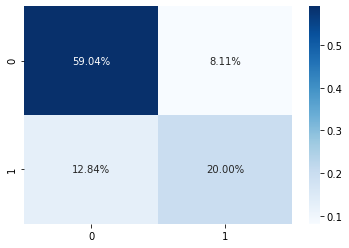

In [9]:

print('La precisión del método es', accuracy_score(y_test, y_p))
sns.heatmap(confusion_matrix(y_test, y_p)/np.sum(confusion_matrix(y_test, y_p)), annot=True, fmt='0.2%',  cmap='Blues')
